In [6]:
from numpy import random
import numpy as np

np.set_printoptions(suppress=True, precision=3) 

目标函数：$\max\text{：}f\left( x \right) =x_1x_2x_3$

s.t.
$\left\{ \begin{array}{l}
	-x_1+2x_2+2x_3\ge 0\\
	x_1+2x_2+2x_3\le 72\\
	10\le x_2\le 20\\
	x_1-x_2=10\\
\end{array} \right.$


#### 方法一：蒙特卡洛模拟

In [7]:
n = 1000000
x2 = random.uniform(10, 20, n)
x1 = x2 + 10
x3 = random.uniform(-10, 16, n)
fmax = -np.inf
for i in range(n):
    x = [x1[i], x2[i], x3[i]]
    if (-x[0]+2*x[1]+2*x[2]) >= 0 and (x[0]+2*x[1]+2*x[2]) <= 72:
        result = x[0]*x[1]*x[2]
        if result > fmax:
            fmax = result
            X = x
print('最优解为：',fmax)
print('x1,x2,x3的取值分别为',X)

最优解为： 3444.954580414894
x1,x2,x3的取值分别为 [22.48939234089351, 12.489392340893508, 12.264912963150216]


#### 方法二：利用Scipy

In [9]:
from scipy.optimize import minimize
from scipy.optimize import Bounds

In [10]:
# 目标函数
def func(x):
    return -(x[0]*x[1]*x[2])
# 梯度函数（偏导函数）
def func_deriv(x):
    dfdx0 = -x[1]*x[2]
    dfdx1 = -x[0]*x[2]
    dfdx2 = -x[0]*x[1]
    return np.array([dfdx0, dfdx1, dfdx2])
# 变量范围约束
bounds = Bounds([-100, 10, -100], [100, 20, 100])
# 约束条件
cons = ({'type': 'eq',
         'fun': lambda x: np.array([x[0]-x[1]-10])},
        {'type': 'ineq',
         'fun': lambda x: np.array([-x[0]+2*x[1]+2*x[2]])},
        {'type':'ineq',
         'fun': lambda x: np.array([x[1]-10])},
        {'type':'ineq',
         'fun': lambda x: np.array([-x[1]+20])},
        {'type': 'ineq',
         'fun': lambda x: np.array([-(x[0]+2*x[1]+2*x[2])-72])})
res = minimize(func,x0=[1,1,1], method='SLSQP',
               constraints=cons, options={'disp': True})
print(res.x)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.8993138818133618
            Iterations: 6
            Function evaluations: 10
            Gradient evaluations: 2
[ 1.496  1.235 -0.487]


### 0-1规划

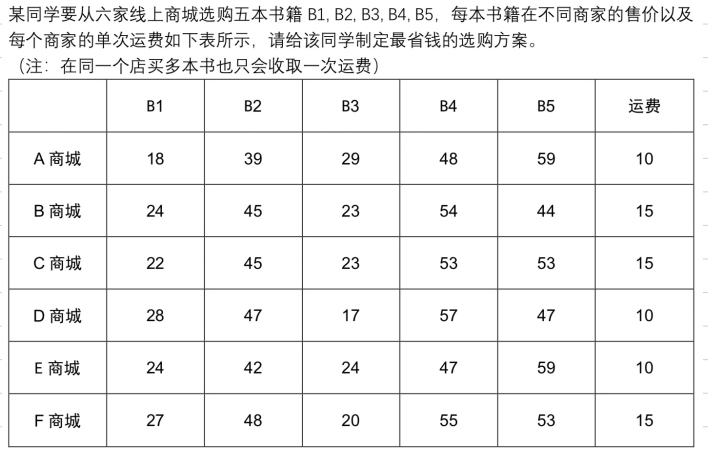

In [19]:
random.randint(0,6,5)

array([4, 2, 2, 5, 2])

In [20]:
min_money = np.inf
min_result = np.zeros(5)
n = 100000
m = np.array([18,39,29,48,59,24,45,23,54,44,22,45,23,53,53,28,47,17,57,47,24,42,24,47,59,27,48,20,55,53]).reshape(6,5)
trans_fee = np.array([10,15,15,10,10,15])
for k in range(n):
    result = random.randint(0,6,5)
    index = np.unique(result)
    trans_cost = sum(trans_fee[index])
    book_cost = 0
    for i in range(5):
        cost = m[result[i], i]
        book_cost += cost
    total = book_cost + trans_cost
    if total < min_money:
        min_money = total
        min_result = result
print('总花费：',min_money)
print('情况：',min_result)

总花费： 189
情况： [0 0 3 0 3]
